# Neural networks - Single Neuron as Binary Classifier 

<hr style="border:2px solid gray">

# Index: <a id='index'></a>
1. [Activation Function](#activation)
1. [Generating Data](#data)
1. [Building a Neuron](#neuron)
1. [Building a Training Function](#trainfunc)
1. [Training](#training)
1. [Visualise What We've Done](#visual)
1. [Conclusion](#sum)

<hr style="border:2px solid gray">

# Activation Function [^](#index) <a id='activation'></a>

Thus far in the course we have covered classical machine learning algorithms, most of which make use of linear combinations of the data fed to them. The scope of what we are able to achieve is widened when we add non-linearity to our algorithms, using activation functions.

As you will discover, neurons in a neural network are arranged in layers. Not unlike in the human brain, a neuron receives signals of varying strength from other neurons, and essentially 'decides' whether this combined received signal is strong enough for the neuron to 'fire', and how strongly.

This 'decision' element is replicated by the presence of the activation function in our neuron. All contributions from previous neurons to which it is connected are summed, and passed to the activation function, which then influences how strong a signal our neuron outputs, if any at all.

Without this non-linear aspect to our neuron, it would simply output a linear combination of the data passed to it by previous neurons, which in turn also simply contain some linear combination of the data passed to them. We would find that the output of our algorithm is nothing but a linear combination of our input data, and we have therefore achieved nothing special. 

The real prediction power of neural networks stems precisely from the non-linearity brought about by the presence of activation functions and, as you will find out, there are several choices of activation function we can make, each of which have their own advantages and drawbacks. 

Run the cell below first - it contains the relevant imports for the notebook.

In [1]:
import sklearn, sklearn.datasets
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<div style="background-color:#C2F5DD">
    
One of the most common activation functions is the sigmoid function. Make your own below.

In [2]:
def sigmoid(v):
    s= 1 / (1 + np.exp(-v))
    return(s)

Now plot your sigmoid function.

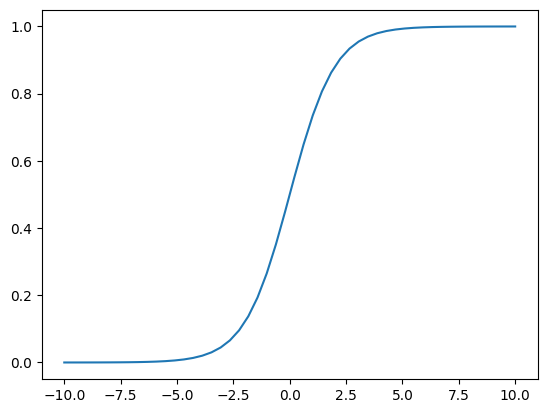

In [3]:
x=np.linspace(-10,10)
plt.plot(x,sigmoid(x))

You can run the code cell below to perform some basic checks that your sigmoid function is correct.

In [6]:
assert sigmoid(0.0) == 0.5 # zero of sigmoid should be 0.5
assert sigmoid(10.0) - 0.9999 < 0.0005
assert sigmoid(-10.0) < 0.0005
# Does this run? Your sigmoid is hopefully OK!

<hr style="border:2px solid gray">

# Generating Data [^](#index) <a id='data'></a> 

We begin by generating a toy dataset.

In [7]:
np.random.seed(2) 
n_samples=200

X, Y = sklearn.datasets.make_classification(n_features=2, n_redundant=0, n_samples=n_samples,
    n_informative=2, random_state=None, n_clusters_per_class=1)

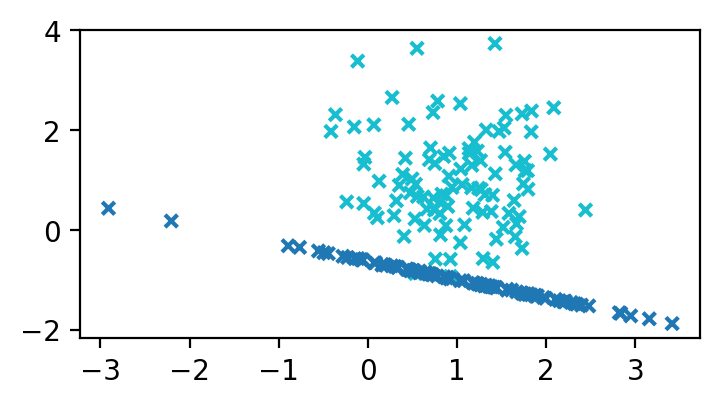

In [8]:
plt.rcParams['figure.figsize'] = [4,2] 
plt.rcParams['figure.dpi'] = 200 

colors = sns.color_palette("tab10", as_cmap=True)
plt.scatter(X[:,0],X[:,1], c = Y, s=20, marker = 'x', cmap = colors)
plt.show()

<hr style="border:2px solid gray">

# Building a Neuron [^](#index) <a id='neuron'></a>

In this section we will talk through the simplest possible example of a neural network - the single neuron perceptron. Neural networks used in industry and academia can consist of millions of neurons. In notebooks to come, we will begin to look at larger, deeper neural networks, and will gain an appreciation for how neurons fit together and interact.

<img src="https://static.packt-cdn.com/products/9781788397872/graphics/bc193cf1-aeb4-432e-9f21-e86c1fd45160.png" width="450" height="300" />

(Image taken from https://static.packt-cdn.com/products/9781788397872/graphics/bc193cf1-aeb4-432e-9f21-e86c1fd45160.png, depicting a single layer perceptron with 3 input weights. Note that in our example we have only 2.)

A single neuron consists of weight(s), a bias term (generally, but not in this
case) and an activation function.
Data which is fed into the neuron is multiplied by the weight (dot product).
The result of this computation is passed through the activation function and output by the neuron.

<div style="background-color:#C2F5DD">

Build your own neuron below.

In [22]:
def neuron(X, w=[0.0,0.0]):
    a= np.dot(np.array(X), np.array(w)) # product of data and the weights vector
    y= sigmoid(a) # activation function for non-linearity
    return y

The cell below serves as a basic check that you have implemented your neuron function correctly. If you **don't** see an assertion error, you can move on.

In [23]:
assert neuron([0.0], w=[1.0]) == 0.5 # one weight of 1.0 = a neuron that is the sigmoid function
assert neuron([0.5,0.5], w=[0.0,0.0])==0.5

Now we can visualise the neuron:

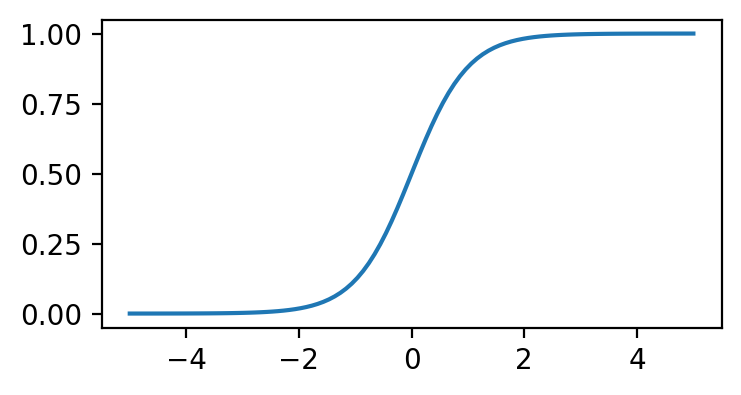

In [27]:
Xrange=np.linspace(-5,5,100)

plt.plot(Xrange,neuron(np.transpose([Xrange]),w=[2])) # edit the weight to see what happens!

In the example above, we have just an input layer and a single neuron output layer. We have 2 weights, which we store in a weights vector. In neural networks in general, we can have many layers consisting of many neurons, so higher dimensional objects are required to store the parameters of our model. In general, we would have a **matrix of weights** for each layer in the network.

<hr style="border:2px solid gray">

# Building a Training Function [^](#index) <a id='trainfunc'></a>

Training your model works using the familiar gradient descent method, with the usual hyperparameters. 

$\eta=$ learning rate

$\alpha=$ decay parameter

In [28]:
eta=0.1 # learning rate
alpha=0.0 # decay parameter

We are using gradient descent, so we are going to require some gradients: that is, the rate of change of the loss function with respect to each parameter of the model. In this case, we have 2 parameters, the 2 weights.

In [29]:
w=np.array([0.5,0.5])

<div style="background-color:#C2F5DD">

Fill out variable a. a is what is passed into the activation function in the equation below.

$$y=\sigma ( X  w ) $$

where $\sigma$ is our activation function, in this case the sigmoid function. 


In [30]:
a= np.dot(np.array(X), np.array(w))
np.shape(a) # it's always useful to keep track of the shape of your 'tensors' as you progress through the code

(200,)

<div style="background-color:#C2F5DD">

We then need to pass this to our activation function, in this case the sigmoid function.

In [31]:
y= sigmoid(a)
np.shape(y)

(200,)

We need to define a loss function that we wish to minimise - here we use the **squared error**.

For a single instance, the loss is given by:
$$ l_i=(Y_i-y_i)^2 $$

where $y_i$ is the output predicted by our model from data point $x_i$ and $Y_i$ is the true value for a given data point.

So our total loss or cost, is given by:

$$\sum_i^n l_i = \sum_i^n (Y_i-y_i)^2$$

Thanks to the way we can manipulate arrays in numpy, we don't have to perform this calculation explicitly for each data point.

<div style="background-color:#C2F5DD">
Define the loss function. It should be an array called L consisting of the loss for each data point.
</div>
    
We will later find the sum of this array as a measure of our 'badness of fit' which we wish to minimise in the training process.

In [32]:
# squared error loss function
L = []
for i, pred in enumerate(y):
    L.append((Y[i] - pred)**2)
L = np.array(L)

<div style="background-color:#FFCCCB">

The formula for the gradient is then:

$$ gradient = \begin{bmatrix} 
    \frac{\partial L}{\partial w_1} \\ 
    \frac{\partial L}{\partial w_2} 
\end{bmatrix} 
=
\begin{bmatrix}
            \sum_i 2x_{i,1} y_i (y_i - Y_i)(1-y_i) \\ 
            \sum_i 2x_{i,2} y_i (y_i - Y_i)(1-y_i) \\
         \end{bmatrix}$$

Where $x_{i,1}$ is the $1^{st}$ feature of the $i^{th}$ data point; $y_i$ here represents $\sigma(\boldsymbol{x_i} \cdot \boldsymbol{w})$
    
</div>

The gradient we want is the rate of change of the loss function with respect to our weights, 

\begin{bmatrix}
           w_1 \\
           w_2 \\
         \end{bmatrix}
         
It makes sense that our gradient is of the same shape as the weights vector. It is necessarily the case for us, as we will be subtracting multiples of the gradient from the weights vector.

Defining a new vector, $\lambda$, as:

$$\lambda = \begin{bmatrix}
             2 y_1 (y_1 - Y_1)(1-y_1) \\
             \vdots \\
             2  y_n (y_n - Y_n)(1-y_n) \\
         \end{bmatrix}$$

We can express the gradient in terms of the $\lambda$ vector and our X matrix:

$$ gradient = X^T\lambda $$


[We can sense-check this dimensionally: multiplying a (2xn) matrix ($X$) by a (nx1) vector ($\lambda$) will give a (2x1) vector as expected.]

So we find the gradient and store it in a variable.

In [33]:
Lambda = 2*y*(y-Y)*(1-y)
gradient = np.matmul(X.T,Lambda)
gradient

array([ 19.53703739, -33.35041833])

Finally, we update our weights.

In [34]:
w = w - eta * (gradient + alpha * w)

<hr style="border:2px solid gray">

# Training [^](#index) <a id='training'></a> 

In the cells above, we completed one training step by computing products of the input data and the model weights, then passing to the activation function, calculating the error and updating our parameter values using the gradient. Much more convenient would be to have a function which completes one full training step.

<div style="background-color:#C2F5DD">


<div style="background-color:#C2F5DD"

Implement your training function below.

In [50]:
def train(X,Y,w, eta=0.05, alpha=0.0):
    a= np.dot(np.array(X), np.array(w)) # product of input data and weights
    y= sigmoid(a) # activation function
    e = (np.array(Y) - np.array(y))**2
    gradient = -np.dot(np.array(X).T, (np.array(Y) - np.array(y)))
    w= w - eta * gradient # gradient descent - take step in direction of negative gradient
    loss=sum(abs(e)) # find the sum of the array of losses
    return(w,loss)

## Training loop

We can now use our train function in a for loop.

<div style="background-color:#C2F5DD"

Experiment with different values of the eta and alpha hyperparameters and observe the effect on the training process using the next section.

In [58]:
w=np.array([0.1, 0.1]) # initial neuron weights

weights=[]
loss=[]
for i in range(1,100): # run this many training steps
    w,e=train(X,Y,w)   # train
    weights.append(w)  # keep track of the weights
    loss.append(e)     # keep track of the loss

<hr style="border:2px solid gray">

# Visualise What We've Done [^](#index) <a id='visual'></a> 

Plot neuron weights and loss function on the same axis, as a function of the training epoch.

Text(0, 0.5, 'Loss')

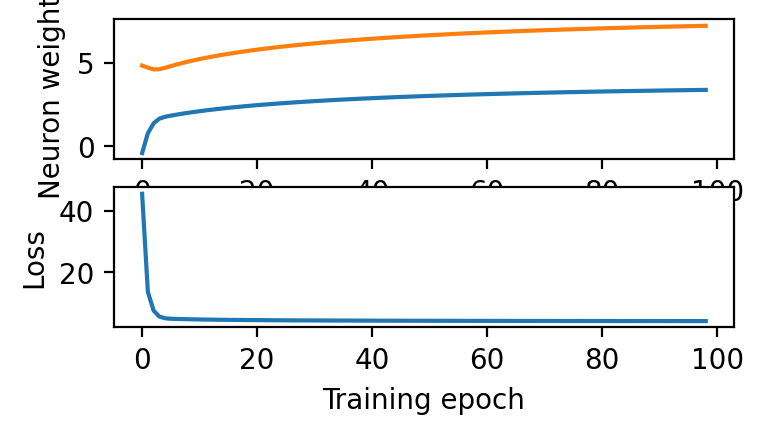

In [57]:
plt.figure(1)
plt.subplot(211)

plt.plot(weights)
plt.xlabel("Training epoch")
plt.ylabel("Neuron weights")

plt.subplot(212)

plt.plot(loss)
plt.xlabel("Training epoch")
plt.ylabel("Loss")

Below is the final loss - loss is what we were trying to minimise.

In [53]:
loss[-1]

np.float64(4.000937018202269)

The cell below visualises how the neural decision boundary changes as we train the model.

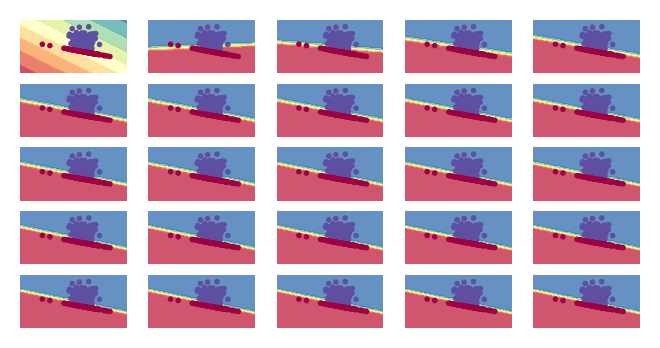

In [54]:
w=np.array([0.1, 0.1]) #initial neuron weights

for i in range(1,26):
    ax = plt.subplot(5, 5, i)
    plt.axis('off')
    
    
    N=25
    Xgrid=np.meshgrid(np.linspace(-5, 5, N), np.linspace(-5, 5, N))
    Xgrid2=np.array([np.ndarray.flatten(Xgrid[0]), np.ndarray.flatten(Xgrid[1])])
    predict=neuron(np.transpose(Xgrid2),w) # re-using our neuron function from earlier
    predict=predict.reshape( (N,N) )
    
    plt.contourf(Xgrid[0], Xgrid[1] ,predict, cmap=plt.cm.Spectral, alpha=0.8)
    # scatter plot of the training data
    plt.scatter(X[:,0],X[:,1], c=Y, s=1, cmap=plt.cm.Spectral)
    
    w,loss=train(X,Y,w)


# Conclusion [^](#index) <a id='sum'></a>

In this notebook, we had our first look at a basic neural network consisting of just an input and an output layer. 

We were introduced to the importance of activation functions, and how they allow us to achieve more than traditional machine learning techniques (note that these techniques are still widely used and can be extremely powerful).

We carried out most of the training steps by hand, with no help from any specialised machine-learning specific modules.

In the next notebook, we begin to move onto larger networks, containing what are known as 'hidden layers' - these are the key to building deep neural networks, from which the term deep learning originates. 

We will achieve more with less code, using the powerful machine learning package, PyTorch.